In [1]:
import numpy as np
import pandas as pd

from catboost import Pool, CatBoostRegressor

In [2]:
df = pd.read_csv("pharmacy_new.csv")

In [3]:
df =df.drop(columns=['tx_date', 'drug', 'diagnosis_letter', 'diagnosis_number','Unnamed: 0'])

In [4]:
df = df[df['rejected'] == False]
df = df.drop(columns='rejected')

In [5]:
df['pcn'].fillna('gp_'+df['group'], inplace=True)
df =df.drop(columns=['group'])
df['pcn'].fillna(value = 'None', inplace = True)

In [6]:
train_data = df.drop(columns=['patient_pay'])
train_label = df['patient_pay']

In [7]:
train_pool = Pool(train_data, train_label, cat_features = [0,1,2,3,4,5,6])

In [16]:
model = CatBoostRegressor(iterations =100, 
                         depth = 5,
                         learning_rate=1,
                         loss_function = 'RMSE')

In [11]:
model.fit(train_pool)
preds=model.predict(train_data)

0:	learn: 28.3320604	total: 5.73s	remaining: 9m 26s
1:	learn: 24.4616928	total: 10.8s	remaining: 8m 51s
2:	learn: 19.2482540	total: 15.6s	remaining: 8m 23s
3:	learn: 18.7306895	total: 18.9s	remaining: 7m 32s
4:	learn: 18.5820936	total: 22.8s	remaining: 7m 12s
5:	learn: 18.4391679	total: 26.1s	remaining: 6m 49s
6:	learn: 17.7018669	total: 29.4s	remaining: 6m 30s
7:	learn: 17.4925444	total: 32.8s	remaining: 6m 16s
8:	learn: 17.3524262	total: 36s	remaining: 6m 3s
9:	learn: 17.2189389	total: 39.3s	remaining: 5m 53s
10:	learn: 17.1747942	total: 43.1s	remaining: 5m 48s
11:	learn: 17.1394510	total: 46.5s	remaining: 5m 40s
12:	learn: 17.1119929	total: 49.8s	remaining: 5m 33s
13:	learn: 17.0744009	total: 53.2s	remaining: 5m 26s
14:	learn: 17.0286767	total: 56.8s	remaining: 5m 21s
15:	learn: 16.9887012	total: 1m	remaining: 5m 15s
16:	learn: 16.9218531	total: 1m 3s	remaining: 5m 9s
17:	learn: 16.8598926	total: 1m 6s	remaining: 5m 3s
18:	learn: 16.8127975	total: 1m 9s	remaining: 4m 58s
19:	learn: 

In [12]:
diff = preds - train_label

In [13]:
diff.describe()

count    1.151201e+07
mean    -7.683035e-03
std      1.598796e+01
min     -4.718744e+02
25%     -1.436284e+00
50%      3.555092e-02
75%      1.694221e+00
max      2.468952e+02
Name: patient_pay, dtype: float64

In [8]:
model2 = CatBoostRegressor(iterations =40, 
                         depth = 6,
                         learning_rate=1,
                         loss_function = 'RMSE')

In [9]:
model2.fit(train_pool)
preds2=model2.predict(train_data)
diff2 = preds2 - train_label
diff2.describe()

0:	learn: 28.3320604	total: 1.94s	remaining: 1m 15s
1:	learn: 24.4435064	total: 3.86s	remaining: 1m 13s
2:	learn: 19.0557699	total: 5.42s	remaining: 1m 6s
3:	learn: 18.5336022	total: 7.1s	remaining: 1m 3s
4:	learn: 17.5488085	total: 8.4s	remaining: 58.8s
5:	learn: 17.2131901	total: 9.69s	remaining: 54.9s
6:	learn: 16.9826051	total: 11.2s	remaining: 52.7s
7:	learn: 16.8872758	total: 12.5s	remaining: 50s
8:	learn: 16.8260813	total: 14.1s	remaining: 48.5s
9:	learn: 16.7543176	total: 15.4s	remaining: 46.2s
10:	learn: 16.7083288	total: 16.7s	remaining: 44.1s
11:	learn: 16.6476544	total: 18s	remaining: 42.1s
12:	learn: 16.6237064	total: 19.4s	remaining: 40.2s
13:	learn: 16.5751300	total: 20.8s	remaining: 38.6s
14:	learn: 16.5306303	total: 22.1s	remaining: 36.9s
15:	learn: 16.5044781	total: 23.5s	remaining: 35.2s
16:	learn: 16.4809701	total: 24.9s	remaining: 33.7s
17:	learn: 16.4588190	total: 26.2s	remaining: 32.1s
18:	learn: 16.4221547	total: 27.6s	remaining: 30.5s
19:	learn: 16.3896982	tota

count    1.151201e+07
mean     2.554492e-04
std      1.605339e+01
min     -4.874362e+02
25%     -1.559334e+00
50%      1.180992e-01
75%      1.760324e+00
max      2.366964e+02
Name: patient_pay, dtype: float64

In [19]:
max(diff2)

249.48771590759173

In [20]:
df[diff2>249]

,pharmacy,diagnosis,bin,pcn,patient_pay,brand,drug_name,month
462022,11,C68.95,571569,KB38N,22.7,branded,nicotilin,1
1372429,11,C68.95,571569,KB38N,22.7,branded,nicotilin,2
2229176,11,C68.95,571569,KB38N,22.7,branded,nicotilin,3
3310060,11,C68.95,571569,KB38N,22.7,branded,nicotilin,4


In [21]:
preds[diff2>249]

array([269.59519662, 269.59519662, 269.59519662, 269.59519662])

In [23]:
df[df['drug_name']=='nicotilin']

,pharmacy,diagnosis,bin,pcn,patient_pay,brand,drug_name,month
410,6,M06.85,725700,OO0E,15.43,branded,nicotilin,1
877,22,M06.85,322463,gp_HO8HUGL,16.47,branded,nicotilin,1
1411,24,M06.85,571569,KB38N,51.96,branded,nicotilin,1
1507,54,M06.85,96934,9D24,19.74,branded,nicotilin,1
2563,8,M06.85,691847,N098KI,63.94,branded,nicotilin,1
...,...,...,...,...,...,...,...,...
12559714,14,M06.85,757349,MSCXSG,65.01,branded,nicotilin,12
12560135,33,M06.85,571569,KB38N,21.36,branded,nicotilin,12
12561550,6,M06.85,539437,gp_1CAHL,73.75,branded,nicotilin,12
12561800,22,M06.85,322463,gp_0TZ9XYJZJH,67.41,branded,nicotilin,12


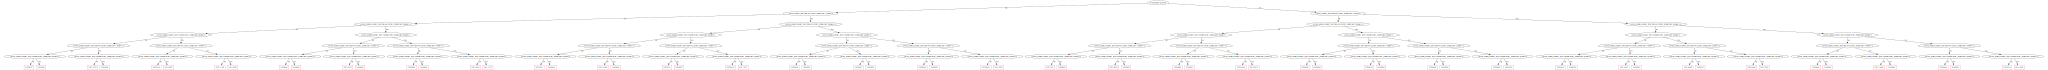

In [11]:
model2.plot_tree(tree_idx=3, pool=train_pool)

In [12]:
model3 = CatBoostRegressor(iterations =40, 
                         depth = 6,
                         learning_rate=1,
                         loss_function = 'MAE')

In [13]:
model3.fit(train_pool)
preds3=model3.predict(train_data)
diff3 = preds3 - train_label
diff3.describe()

0:	learn: 12.9492517	total: 3.37s	remaining: 2m 11s
1:	learn: 9.2223052	total: 6.5s	remaining: 2m 3s
2:	learn: 8.5751742	total: 9.24s	remaining: 1m 53s
3:	learn: 7.9001559	total: 11.6s	remaining: 1m 44s
4:	learn: 7.4238985	total: 14.1s	remaining: 1m 38s
5:	learn: 7.2841980	total: 16.7s	remaining: 1m 34s
6:	learn: 6.6575842	total: 19.4s	remaining: 1m 31s
7:	learn: 6.6196460	total: 21.9s	remaining: 1m 27s
8:	learn: 6.5591868	total: 24.5s	remaining: 1m 24s
9:	learn: 6.5319386	total: 26.9s	remaining: 1m 20s
10:	learn: 6.4747707	total: 29.6s	remaining: 1m 17s
11:	learn: 6.4247125	total: 32s	remaining: 1m 14s
12:	learn: 6.4002145	total: 34.5s	remaining: 1m 11s
13:	learn: 6.3898488	total: 37s	remaining: 1m 8s
14:	learn: 6.2861105	total: 39.4s	remaining: 1m 5s
15:	learn: 6.2196198	total: 41.8s	remaining: 1m 2s
16:	learn: 6.1918939	total: 44.4s	remaining: 1m
17:	learn: 6.1840596	total: 46.9s	remaining: 57.3s
18:	learn: 6.1810052	total: 49.3s	remaining: 54.5s
19:	learn: 6.1636465	total: 51.8s	re

count    1.151201e+07
mean    -5.587598e-01
std      1.902101e+01
min     -4.630901e+02
25%     -1.019993e+00
50%      7.453919e-07
75%      7.993964e-01
max      2.154803e+02
Name: patient_pay, dtype: float64

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(train_label, preds3, squared = False)

19.02921442244623

In [16]:
from scipy.stats import t

In [19]:
m3 = diff3.mean() 
s3 = diff3.std() 
dof3 = len(diff3)-1 
confidence = 0.95

In [20]:
t_crit = np.abs(t.ppf((1-confidence)/2,dof3))

In [21]:
# confident interview
(m3-s3*t_crit/np.sqrt(len(diff3)), m3+s3*t_crit/np.sqrt(len(diff3))) 

(-0.5697474452726107, -0.5477720768777506)

In [23]:
confidence = 0.99
t_crit = np.abs(t.ppf((1-confidence)/2,dof3))
(m3-s3*t_crit/np.sqrt(len(diff3)), m3+s3*t_crit/np.sqrt(len(diff3))) 

(-0.5732000267504951, -0.5443194953998662)

In [26]:
np.percentile(diff3, 90), np.percentile(diff3, 95), np.percentile(diff3, 98), np.percentile(diff3, 99), np.percentile(diff3, 100)

(6.190121324110294,
 14.080013825217915,
 30.829774912614873,
 49.00995197970201,
 215.4802583684414)

In [29]:
import shap

In [28]:
#pip install shap

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 435.6/435.6 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [33]:
explainer=shap.Explainer(model3)
shap_values=explainer.shap_values(train_data)

In [43]:
shap.initjs()

In [44]:
shap.force_plot(explainer.expected_value, shap_values[0,:], train_data.iloc[0,:])

In [52]:
shap.force_plot(explainer.expected_value, shap_values[0:100,:], train_data.iloc[0:100,:])

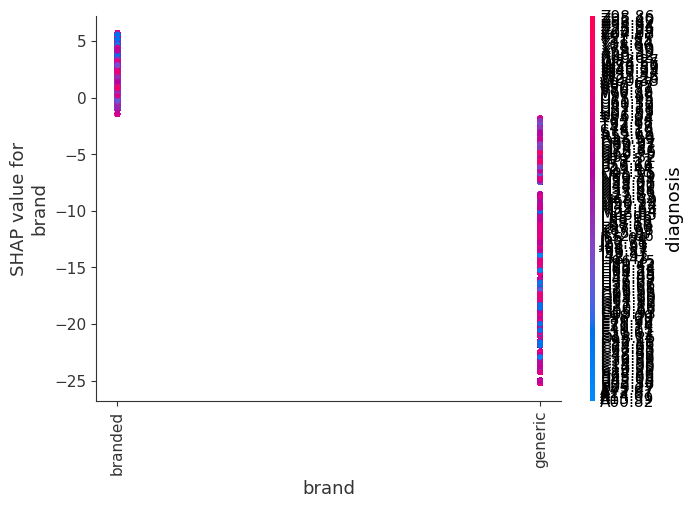

In [53]:
shap.dependence_plot('brand', shap_values, train_data)

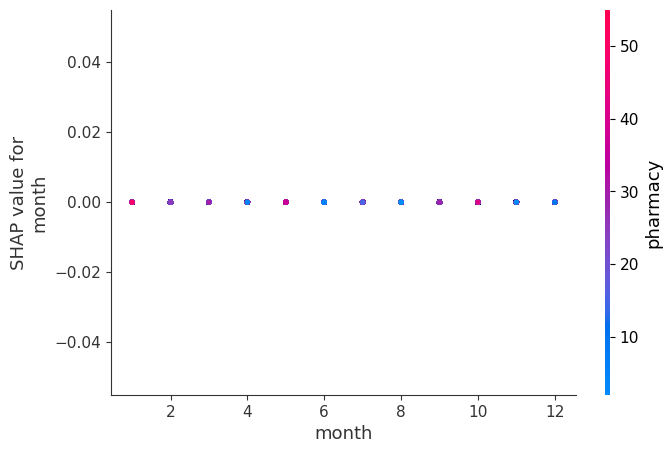

In [54]:
shap.dependence_plot('month', shap_values, train_data)

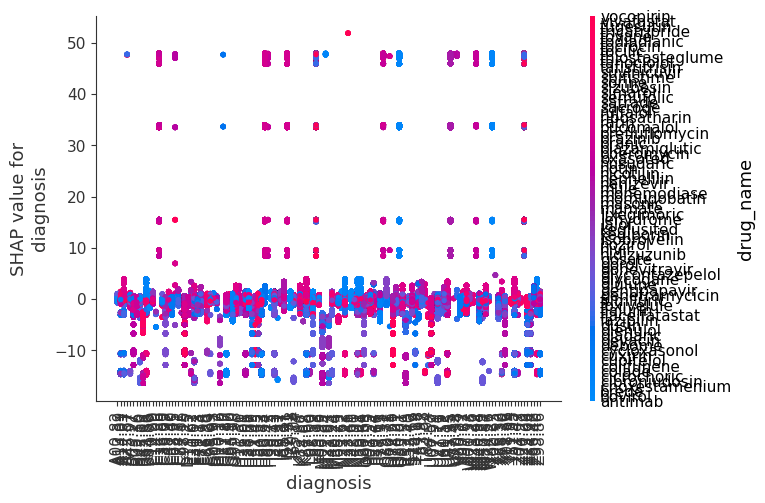

In [55]:
shap.dependence_plot('diagnosis', shap_values, train_data)

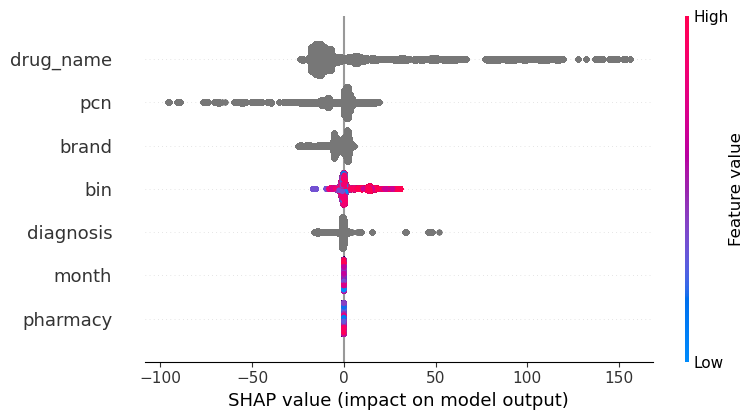

In [56]:
shap.summary_plot(shap_values, train_data)